In [2]:
# Task 1 - Data Preprocessing and Statistics
#
#
# Read Mobike Data

import pandas as pd
import geohash as geo
import math as math

mobikedata = pd.read_csv('../data/mobikeData.csv', nrows=500000, parse_dates=['starttime'], date_parser=lambda col: pd.to_datetime(col, utc=True))



In [3]:
# Convert the field geohashed_start_loc and geohashed_end_loc into x-y coordinate 

mobikedata['geohashed_start_loc'] = mobikedata['geohashed_start_loc'].map(lambda loc:list(geo.decode_exactly(loc))).map(lambda x:[x[0],x[1]])
mobikedata['geohashed_end_loc'] = mobikedata['geohashed_end_loc'].map(lambda loc:list(geo.decode_exactly(loc))).map(lambda x:[x[0],x[1]])

mobikedata.head(10)


,orderid,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc
0,1893973,451147,210617,2,2017-05-14 22:16:50+00:00,"[40.10353088378906, 116.28959655761719]","[40.10078430175781, 116.28684997558594]"
1,4657992,1061133,465394,1,2017-05-14 22:16:52+00:00,"[39.79042053222656, 116.32530212402344]","[39.79728698730469, 116.32255554199219]"
2,2965085,549189,310572,1,2017-05-14 22:16:51+00:00,"[39.88243103027344, 116.54228210449219]","[39.87556457519531, 116.55189514160156]"
3,4548579,489720,456688,1,2017-05-14 22:16:51+00:00,"[39.76570129394531, 116.16325378417969]","[39.76570129394531, 116.16188049316406]"
4,3936364,467449,403224,1,2017-05-14 22:16:50+00:00,"[39.96345520019531, 116.38847351074219]","[39.95933532714844, 116.38160705566406]"
5,5163705,917620,509044,1,2017-05-14 22:16:53+00:00,"[39.99366760253906, 116.47087097167969]","[39.98817443847656, 116.46400451660156]"
6,19818,583391,3190,1,2017-05-14 22:16:54+00:00,"[39.75059509277344, 116.56013488769531]","[39.74510192871094, 116.56288146972656]"
7,495333,185893,67441,1,2017-05-14 22:16:53+00:00,"[39.96620178222656, 116.27723693847656]","[39.96482849121094, 116.27449035644531]"
8,2803108,15906,295614,2,2017-05-14 22:16:55+00:00,"[39.84535217285156, 116.39122009277344]","[39.84260559082031, 116.39671325683594]"
9,271970,183740,38335,1,2017-05-14 22:16:54+00:00,"[39.89067077636719, 116.32667541503906]","[39.88105773925781, 116.33216857910156]"


In [4]:
# Create the column 'distance' based on the Euclidean distance that the order has traveled.

def dist(end, start):
    return math.sqrt((end[0]-start[0])*(end[0]-start[0]) + (end[1]-start[1])*(end[1]-start[1]))

mobikedata['distance'] = mobikedata.apply(lambda row: dist(row['geohashed_end_loc'], row['geohashed_start_loc']), axis=1)

# print(mobikedata['distance'])

In [5]:
# Check the memory we have spent

mobikedata.info()

#  Task 1.4.2  Compress the field orderid userid bikeid using a smaller data type int32 and the field biketype using int8

mobikedata['orderid'] = mobikedata['orderid'].astype('int32')
mobikedata['userid'] = mobikedata['userid'].astype('int32')
mobikedata['bikeid'] = mobikedata['bikeid'].astype('int32')
mobikedata['biketype'] = mobikedata['biketype'].astype('int8')

# Task 1.343 Check the memory you have spent again

mobikedata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
orderid                500000 non-null int64
userid                 500000 non-null int64
bikeid                 500000 non-null int64
biketype               500000 non-null int64
starttime              500000 non-null datetime64[ns, UTC]
geohashed_start_loc    500000 non-null object
geohashed_end_loc      500000 non-null object
distance               500000 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(2)
memory usage: 30.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
orderid                500000 non-null int32
userid                 500000 non-null int32
bikeid                 500000 non-null int32
biketype               500000 non-null int8
starttime              500000 non-null datetime64[ns, UTC]
geohashed_start_loc    500000 non-null object
geohashed_end_loc      500000 n

In [6]:
# Fetch the first 10 lines

mobikedata.head(10)


,orderid,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc,distance
0,1893973,451147,210617,2,2017-05-14 22:16:50+00:00,"[40.10353088378906, 116.28959655761719]","[40.10078430175781, 116.28684997558594]",0.003884
1,4657992,1061133,465394,1,2017-05-14 22:16:52+00:00,"[39.79042053222656, 116.32530212402344]","[39.79728698730469, 116.32255554199219]",0.007395
2,2965085,549189,310572,1,2017-05-14 22:16:51+00:00,"[39.88243103027344, 116.54228210449219]","[39.87556457519531, 116.55189514160156]",0.011813
3,4548579,489720,456688,1,2017-05-14 22:16:51+00:00,"[39.76570129394531, 116.16325378417969]","[39.76570129394531, 116.16188049316406]",0.001373
4,3936364,467449,403224,1,2017-05-14 22:16:50+00:00,"[39.96345520019531, 116.38847351074219]","[39.95933532714844, 116.38160705566406]",0.008008
5,5163705,917620,509044,1,2017-05-14 22:16:53+00:00,"[39.99366760253906, 116.47087097167969]","[39.98817443847656, 116.46400451660156]",0.008793
6,19818,583391,3190,1,2017-05-14 22:16:54+00:00,"[39.75059509277344, 116.56013488769531]","[39.74510192871094, 116.56288146972656]",0.006142
7,495333,185893,67441,1,2017-05-14 22:16:53+00:00,"[39.96620178222656, 116.27723693847656]","[39.96482849121094, 116.27449035644531]",0.003071
8,2803108,15906,295614,2,2017-05-14 22:16:55+00:00,"[39.84535217285156, 116.39122009277344]","[39.84260559082031, 116.39671325683594]",0.006142
9,271970,183740,38335,1,2017-05-14 22:16:54+00:00,"[39.89067077636719, 116.32667541503906]","[39.88105773925781, 116.33216857910156]",0.011072


In [7]:
# Display the count, mean, standard derviation of the int type variable and 
#                  display the earliest and latest starttime.

count = mobikedata['biketype'].count()
print('count is: ', count)
mean = mobikedata['biketype'].sum() / count
print('mean is: ', mean)

sd = 0.0
for i in range(count):
    sd = sd + (mobikedata['biketype'][i] - mean) * (mobikedata['biketype'][i] - mean)
sd = math.sqrt(sd/count)
print('standard derviation is: ', sd)

print('earliest starttime is: ', mobikedata['starttime'].min())
print('latest starttime is: ', mobikedata['starttime'].max())

count is:  500000
mean is:  1.400428
standard derviation is:  0.4899851189746549
earliest starttime is:  2017-05-10 00:00:09+00:00
latest starttime is:  2017-05-16 18:18:43+00:00


# Find the number of order between (8am to 9am) and the order between (1am to 2am)

ts = mobikedata.set_index(['starttime'])['orderid']
print(ts.between_time('8:00', '9:00').count())
print(ts.between_time('1:00', '2:00').count())
# print(mobikedata[(mobikedata['starttime'].dt.hour >= 8) & (mobikedata['starttime'].dt.hour <= 9)][['orderid', 'starttime']].count())
# print(mobikedata[(mobikedata['starttime'].dt.hour >= 1) & (mobikedata['starttime'].dt.hour <= 2)][['orderid', 'starttime']].count())


In [9]:
# Task 2 - Data Clustering 
#
#
# Playing with the bikeshare data, create a DataFrame that contains two columns. 
#                 The first column (the index) is a time series 0:00, 0:15, 0:30, 0:45, 1:00,... 23:00, 23:15, 23:30, 23:45
#                  The second column is an integer that counts the number of order between in the interval. 
time = []
for i in range(24):
    for j in range(4):
        min = j * 15
        ms = str(min)
        if min == 0:
            ms = '00'
        s = str(i) + ':' + ms
        time.append(s)
        
# print(time)

# time_count = pd.DataFrame(index=time)
# time_count

In [10]:
# Count the number of orders.
count = []
for i in range(96):
    if i != 95:
        count.append(ts.between_time(time[i], time[i+1], include_end=False).count())
    else:
        count.append(ts.between_time(time[i], time[0], include_end=False).count())

time_count = pd.DataFrame(count, index=time, columns=['volume_of_order'])
print(time_count)
print(time_count['count'].sum())


       volume_of_order
0:00               710
0:15               574
0:30               450
0:45               339
1:00               325
1:15               255
1:30               213
1:45               146
2:00               186
2:15               157
2:30               132
2:45               142
3:00               142
3:15               134
3:30               112
3:45               141
4:00               171
4:15               137
4:30               200
4:45               291
5:00               605
5:15              1445
5:30              1529
5:45              2326
6:00              3590
6:15              5799
6:30              8856
6:45             12698
7:00             16360
7:15             19760
...                ...
16:30             3475
16:45             7126
17:00             9893
17:15             4968
17:30             6972
17:45             6151
18:00            18252
18:15            14854
18:30             6454
18:45             5642
19:00             5413
19:15      

In [11]:
# Use K-mean algorithm to find 300 cluster centers of the coordinates obtained

from sklearn.cluster import KMeans
import numpy as np

array = mobikedata['geohashed_start_loc'].to_list() + mobikedata['geohashed_end_loc'].to_list()
# remove the duplicate coordinates.
array = list(set([tuple(t) for t in array]))

kmeans = KMeans(n_clusters=300, random_state=0).fit(array)
labels = kmeans.labels_
print(labels)
centers = kmeans.cluster_centers_
print(centers)


[141 155 297 ... 189 159 164]
[[ 40.09790501 116.3821783 ]
 [ 23.1452179  113.35784912]
 [ 30.61203003 114.36630249]
 [ 30.59191132 104.01024628]
 [ 39.86584376 116.4000022 ]
 [ 31.19755138 121.40679099]
 [ 39.9023705  116.63711944]
 [ 39.74456398 116.1430218 ]
 [ 40.0106142  116.27233233]
 [ 24.47616577 118.1054306 ]
 [ 34.2313385  108.96034241]
 [ 25.04917145 102.67410278]
 [ 39.85399558 116.50132474]
 [ 40.14304803 116.61626232]
 [ 39.93724213 116.18956156]
 [ 28.17581177 112.98219681]
 [ 39.97016632 116.4133622 ]
 [ 32.07595825 118.77868652]
 [ 39.81987461 116.29945483]
 [ 38.01372528 114.49075699]
 [ 39.68560544 116.58306655]
 [ 22.80143738 108.335495  ]
 [ 40.1139402  116.24720918]
 [ 39.96974945 116.54702217]
 [ 28.65715027 115.85655212]
 [ 39.12267797 117.21139796]
 [ 39.80554806 116.36942656]
 [ 39.90771225 116.30098656]
 [ 22.5585022  113.90995789]
 [ 39.83591785 116.76621319]
 [ 36.07841492 111.53114319]
 [ 39.7241906  116.33630132]
 [ 39.69443153 115.99985235]
 [ 39.8016285

In [12]:
# Describe how many % of order has started from a cluster centers and ends at the same cluster centers. 
match = dict()
index = 0
for i in array:
    match[i] = labels[index]
    index += 1

count = 0
start_list = mobikedata['geohashed_start_loc'].to_list()
end_list = mobikedata['geohashed_end_loc'].to_list()

index = 0
for index in range(mobikedata['geohashed_start_loc'].count()):
    if match[tuple(start_list[index])] == match[tuple(end_list[index])]:
        count += 1
        
print(count)
print(float(count) / mobikedata['geohashed_start_loc'].count())


356049
0.712098


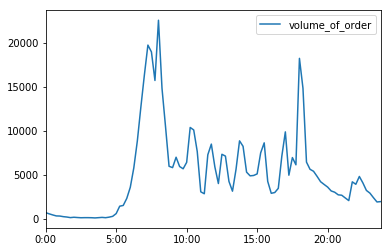

In [16]:
# Task 3 - Simple Data Visualization 
#
#
# Plot a curveof the volume of order in different times of a day.

time_count.plot.line()



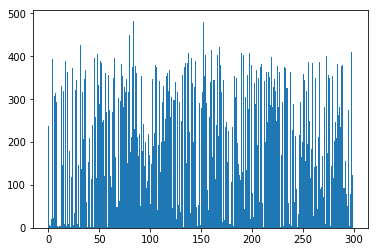

In [22]:
# Plot a histogram of the volume of order in different cluster centers
from matplotlib import pyplot as plt 
plt.hist(labels, bins=list(range(300)))
plt.show()
